In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 
  
# data (as pandas dataframes) 
X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets #1 - bankrut, 0 - nie
  
# metadata 
print(polish_companies_bankruptcy.metadata) 
  
# variable information 
print(polish_companies_bankruptcy.variables) 

{'uci_id': 365, 'name': 'Polish Companies Bankruptcy', 'repository_url': 'https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data', 'data_url': 'https://archive.ics.uci.edu/static/public/365/data.csv', 'abstract': 'The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 10503, 'num_features': 65, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5F600', 'creators': ['Sebastian Tomczak'], 'intro_paper': {'title': 'Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction', 'authors': 'Maciej Ziȩba,

In [130]:
X['Bankruptcy'] = y
X.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [131]:
X.isnull().sum().sum()

41322

In [132]:
(X.isnull().sum()/X.shape[0]).idxmax() #43% brakujących wartości, usuwamy kolumnę
X.drop('A37', axis=1, inplace=True)

In [133]:
X.isnull().sum().sum()

22338

In [134]:
X.mean()

year             2.939753
A1               0.035160
A2               0.590212
A3               0.114431
A4               6.314702
                 ...     
A61             17.033202
A62           1502.521234
A63              9.343074
A64             72.796105
Bankruptcy       0.048174
Length: 65, dtype: float64

In [135]:
X.std()

year               1.283975
A1                 2.994109
A2                 5.842748
A3                 5.439429
A4               295.434425
                  ...      
A61              553.049406
A62           139302.334863
A63              124.177354
A64             2369.744596
Bankruptcy         0.214137
Length: 65, dtype: float64

In [136]:
df = X[X['year'] == 5]
(df.isnull().sum()/(df.shape[0]*df.shape[1])).sum()
df = df.reset_index(drop=True)
df.head() # Bierzemy 5 rok, bo ma najmniejszy stosunek brakujących wartości do ilości wierszy i najbardziej aktualny;  

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy
0,5,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,5,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0
2,5,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0
3,5,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0
4,5,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0


In [138]:
df.isnull().sum().sum()

2118

In [139]:
df3 = df.copy()
df3.dropna(inplace=True) #usuwamy wszystkie puste
df3.isna().sum().sum()

0

In [140]:
df = df.fillna(df.mean()) #uzupełniamy brakujące wartości średnią pozostałych w kolumnie

In [141]:
df.shape[0], df3.shape[0]

(5910, 4998)

In [142]:
df2 = df.copy()

In [144]:
columns = [3, 5, 9, 10, 15, 20, 21, 24, 27, 29, 20, 32, 33, 37, 39, 41, 42, 44, 46, 52, 53, 54, 55, 57, 58, 62]

for column in df.columns:
    if column in columns_to_exclude:
        df[column] = df[column].apply(lambda x: 0 if x < 0 else x)
        df3[column] = df3[column].apply(lambda x: 0 if x < 0 else x)

df3 = df3.reset_index(drop=True)
df = df.reset_index(drop=True)
df

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy
0,5,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0
1,5,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,0
2,5,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,0
3,5,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,0
4,5,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,5,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,5,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,5,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,5,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [145]:
df2 = df2.applymap(lambda x: 0 if x < 0 else x) #inne podejście - usuwamy wszystkie ujemne - zastępujemy zerem

C:\Users\kjani\AppData\Local\Temp\ipykernel_18152\1918351092.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: 0 if x < 0 else x) #inne podejście - usuwamy wszystkie ujemne - zastępujemy zerem


In [146]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df)

In [147]:
scaler = preprocessing.MinMaxScaler().fit(df)

df_scaled = scaler.transform(df) #przeskalowanie wartości na zakres [0,1]
df2_scaled = scaler.transform(df2)
df3_scaled = scaler.transform(df3)

df = pd.DataFrame(df_scaled, columns=df.columns) 
df2 = pd.DataFrame(df2_scaled, columns=df2.columns) 
df3 = pd.DataFrame(df3_scaled, columns=df3.columns) 
df

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy
0,0.0,0.841533,0.857216,0.717890,0.000208,0.462641,0.460941,0.989636,0.000628,0.066337,...,0.967587,0.933771,0.022594,0.375118,0.000004,0.003689,0.000840,0.000536,0.000044,0.0
1,0.0,0.841361,0.857077,0.720098,0.000293,0.462672,0.460601,0.989415,0.000698,0.069052,...,0.965326,0.933554,0.024380,0.375423,0.000004,0.002573,0.000770,0.000632,0.000045,0.0
2,0.0,0.841609,0.856554,0.723529,0.000586,0.462721,0.460788,0.989737,0.000989,0.067110,...,0.968475,0.933708,0.021697,0.375114,0.000004,0.002353,0.000682,0.000870,0.000059,0.0
3,0.0,0.841210,0.857876,0.720459,0.000281,0.462645,0.460528,0.989255,0.000562,0.069048,...,0.974563,0.932962,0.015747,0.380952,0.000004,0.002616,0.000850,0.000526,0.000061,0.0
4,0.0,0.841460,0.857207,0.718850,0.000241,0.462659,0.460601,0.989540,0.000662,0.072515,...,0.970879,0.933644,0.019496,0.375397,0.000005,0.003200,0.000759,0.000651,0.000045,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.0,0.841396,0.857517,0.718164,0.000230,0.462661,0.460601,0.989453,0.000604,0.074856,...,0.966332,0.933596,0.024537,0.377668,0.000005,0.009571,0.000632,0.001174,0.000038,1.0
5906,0.0,0.840324,0.858035,0.709801,0.000083,0.462640,0.460027,0.988321,0.000485,0.064191,...,0.964593,0.934682,0.025619,0.375077,0.000026,0.034275,0.000704,0.000790,0.000056,1.0
5907,0.0,0.841048,0.858608,0.715029,0.000168,0.462617,0.460424,0.989130,0.000506,0.067593,...,0.968989,0.933977,0.021177,0.374055,0.000005,0.002737,0.000984,0.000432,0.000086,1.0
5908,0.0,0.841175,0.857592,0.717931,0.000218,0.462662,0.460493,0.989218,0.000562,0.062822,...,0.962134,0.932681,0.028103,0.387469,0.000005,0.004715,0.000708,0.000776,0.000030,1.0


In [148]:
from sklearn.ensemble import IsolationForest #do detekcji outliersów
isfor = IsolationForest()
outliers = isfor.fit_predict(df)
df['outlier'] = outliers #-1 to outlier
df[df['outlier']==-1]
df.drop('year', axis=1)

outliers2 = isfor.fit_predict(df2)
df2['outlier'] = outliers2 #-1 to outlier
df2[df2['outlier']==-1]
df2.drop('year', axis=1)


outliers3 = isfor.fit_predict(df3)
df3['outlier'] = outliers3 #-1 to outlier
df3[df3['outlier']==-1]
df3.drop('year', axis=1)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy,outlier
0,0.841533,0.857216,0.717890,0.000208,0.462641,0.460941,0.989636,0.000628,0.066337,0.174484,...,0.933771,0.022594,0.375118,0.000004,0.003689,0.000840,0.000536,0.000044,0.0,1
1,0.841609,0.856554,0.723529,0.000586,0.462721,0.460788,0.989737,0.000989,0.067110,0.175352,...,0.933708,0.021697,0.375114,0.000004,0.002353,0.000682,0.000870,0.000059,0.0,1
2,0.841460,0.857207,0.718850,0.000241,0.462659,0.460601,0.989540,0.000662,0.072515,0.174799,...,0.933644,0.019496,0.375397,0.000005,0.003200,0.000759,0.000651,0.000045,0.0,1
3,0.841553,0.857306,0.721511,0.000300,0.462677,0.460811,0.989664,0.000641,0.066469,0.174678,...,0.933751,0.022435,0.375245,0.000004,0.001965,0.000812,0.000569,0.000224,0.0,1
4,0.841515,0.856522,0.718812,0.000467,0.462703,0.460964,0.989605,0.001106,0.068422,0.175637,...,0.933638,0.020353,0.375491,0.000005,0.002493,0.000642,0.001093,0.000027,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.841576,0.859571,0.712655,0.000122,0.462634,0.460282,0.989641,0.000482,0.100001,0.171907,...,0.933449,0.023463,0.372838,0.000005,0.024833,0.000739,0.000693,0.000059,1.0,1
4994,0.841210,0.858756,0.714643,0.000157,0.462616,0.459350,0.989255,0.000507,0.082901,0.172904,...,0.933769,0.019994,0.374245,0.000004,0.011891,0.000874,0.000504,0.000064,1.0,1
4995,0.835848,0.869837,0.658048,0.000078,0.462610,0.456890,0.983602,0.000419,0.245619,0.159348,...,0.933953,0.028486,0.375114,0.000021,0.014171,0.000938,0.000457,0.000969,1.0,-1
4996,0.842028,0.856622,0.723382,0.001484,0.462758,0.460278,0.990414,0.000967,0.059170,0.175514,...,0.933930,0.015366,0.375114,0.000003,0.006767,0.000611,0.001409,0.000034,1.0,1


In [149]:
df = df[df['outlier'] == 1].drop(columns=['outlier']) # usuwamy outliersy
df = df.reset_index(drop=True)

df2 = df2[df2['outlier'] == 1].drop(columns=['outlier']) # usuwamy outliersy
df2 = df2.reset_index(drop=True)

df3 = df3[df3['outlier'] == 1].drop(columns=['outlier']) # usuwamy outliersy
df3 = df3.reset_index(drop=True)

In [150]:
df

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy
0,0.0,0.841533,0.857216,0.717890,0.000208,0.462641,0.460941,0.989636,0.000628,0.066337,...,0.967587,0.933771,0.022594,0.375118,0.000004,0.003689,0.000840,0.000536,0.000044,0.0
1,0.0,0.841361,0.857077,0.720098,0.000293,0.462672,0.460601,0.989415,0.000698,0.069052,...,0.965326,0.933554,0.024380,0.375423,0.000004,0.002573,0.000770,0.000632,0.000045,0.0
2,0.0,0.841609,0.856554,0.723529,0.000586,0.462721,0.460788,0.989737,0.000989,0.067110,...,0.968475,0.933708,0.021697,0.375114,0.000004,0.002353,0.000682,0.000870,0.000059,0.0
3,0.0,0.841210,0.857876,0.720459,0.000281,0.462645,0.460528,0.989255,0.000562,0.069048,...,0.974563,0.932962,0.015747,0.380952,0.000004,0.002616,0.000850,0.000526,0.000061,0.0
4,0.0,0.841460,0.857207,0.718850,0.000241,0.462659,0.460601,0.989540,0.000662,0.072515,...,0.970879,0.933644,0.019496,0.375397,0.000005,0.003200,0.000759,0.000651,0.000045,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0.0,0.841396,0.857517,0.718164,0.000230,0.462661,0.460601,0.989453,0.000604,0.074856,...,0.966332,0.933596,0.024537,0.377668,0.000005,0.009571,0.000632,0.001174,0.000038,1.0
5783,0.0,0.840324,0.858035,0.709801,0.000083,0.462640,0.460027,0.988321,0.000485,0.064191,...,0.964593,0.934682,0.025619,0.375077,0.000026,0.034275,0.000704,0.000790,0.000056,1.0
5784,0.0,0.841048,0.858608,0.715029,0.000168,0.462617,0.460424,0.989130,0.000506,0.067593,...,0.968989,0.933977,0.021177,0.374055,0.000005,0.002737,0.000984,0.000432,0.000086,1.0
5785,0.0,0.841175,0.857592,0.717931,0.000218,0.462662,0.460493,0.989218,0.000562,0.062822,...,0.962134,0.932681,0.028103,0.387469,0.000005,0.004715,0.000708,0.000776,0.000030,1.0


In [151]:
df2

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy
0,0.0,0.841533,0.857216,0.717890,0.000208,0.462669,0.460941,0.989636,0.000628,0.066337,...,0.967587,0.933771,0.022594,0.375118,0.000004,0.003689,0.000840,0.000536,0.000044,0.0
1,0.0,0.841373,0.857077,0.720098,0.000293,0.462672,0.460601,0.989427,0.000698,0.069052,...,0.965916,0.933563,0.024380,0.375423,0.000004,0.002573,0.000770,0.000632,0.000045,0.0
2,0.0,0.841609,0.856554,0.723529,0.000586,0.462721,0.460788,0.989737,0.000989,0.067110,...,0.968475,0.933708,0.021697,0.375114,0.000004,0.002353,0.000682,0.000870,0.000059,0.0
3,0.0,0.841373,0.857876,0.720459,0.000281,0.462669,0.460601,0.989427,0.000562,0.069048,...,0.974563,0.933563,0.015747,0.380952,0.000004,0.002616,0.000850,0.000526,0.000061,0.0
4,0.0,0.841460,0.857207,0.718850,0.000241,0.462669,0.460601,0.989540,0.000662,0.072515,...,0.970879,0.933644,0.019496,0.375397,0.000005,0.003200,0.000759,0.000651,0.000045,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5716,0.0,0.841396,0.857517,0.718164,0.000230,0.462669,0.460601,0.989453,0.000604,0.074856,...,0.966332,0.933596,0.024537,0.377668,0.000005,0.009571,0.000632,0.001174,0.000038,1.0
5717,0.0,0.841373,0.858035,0.717777,0.000083,0.462669,0.460601,0.989427,0.000544,0.064191,...,0.965916,0.934682,0.025619,0.375114,0.000026,0.034275,0.000704,0.000790,0.000056,1.0
5718,0.0,0.841373,0.858608,0.717777,0.000168,0.462669,0.460601,0.989427,0.000544,0.067593,...,0.968989,0.933977,0.021177,0.375114,0.000005,0.002737,0.000984,0.000432,0.000086,1.0
5719,0.0,0.841373,0.857592,0.717931,0.000218,0.462669,0.460601,0.989427,0.000562,0.062822,...,0.965916,0.933563,0.028103,0.387469,0.000005,0.004715,0.000708,0.000776,0.000030,1.0


In [152]:
df3

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,Bankruptcy
0,0.0,0.841533,0.857216,0.717890,0.000208,0.462641,0.460941,0.989636,0.000628,0.066337,...,0.967587,0.933771,0.022594,0.375118,0.000004,0.003689,0.000840,0.000536,0.000044,0.0
1,0.0,0.841609,0.856554,0.723529,0.000586,0.462721,0.460788,0.989737,0.000989,0.067110,...,0.968475,0.933708,0.021697,0.375114,0.000004,0.002353,0.000682,0.000870,0.000059,0.0
2,0.0,0.841460,0.857207,0.718850,0.000241,0.462659,0.460601,0.989540,0.000662,0.072515,...,0.970879,0.933644,0.019496,0.375397,0.000005,0.003200,0.000759,0.000651,0.000045,0.0
3,0.0,0.841553,0.857306,0.721511,0.000300,0.462677,0.460811,0.989664,0.000641,0.066469,...,0.967745,0.933751,0.022435,0.375245,0.000004,0.001965,0.000812,0.000569,0.000224,0.0
4,0.0,0.841515,0.856522,0.718812,0.000467,0.462703,0.460964,0.989605,0.001106,0.068422,...,0.969806,0.933638,0.020353,0.375491,0.000005,0.002493,0.000642,0.001093,0.000027,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,0.0,0.841550,0.856468,0.722414,0.000586,0.462690,0.460601,0.989613,0.001213,0.089313,...,0.967088,0.933653,0.023516,0.375114,0.000008,0.006289,0.000578,0.002163,0.000071,1.0
4881,0.0,0.841576,0.859571,0.712655,0.000122,0.462634,0.460282,0.989641,0.000482,0.100001,...,0.965487,0.933449,0.023463,0.372838,0.000005,0.024833,0.000739,0.000693,0.000059,1.0
4882,0.0,0.841210,0.858756,0.714643,0.000157,0.462616,0.459350,0.989255,0.000507,0.082901,...,0.970464,0.933769,0.019994,0.374245,0.000004,0.011891,0.000874,0.000504,0.000064,1.0
4883,0.0,0.842028,0.856622,0.723382,0.001484,0.462758,0.460278,0.990414,0.000967,0.059170,...,0.962700,0.933930,0.015366,0.375114,0.000003,0.006767,0.000611,0.001409,0.000034,1.0


In [153]:
from sklearn.decomposition import PCA

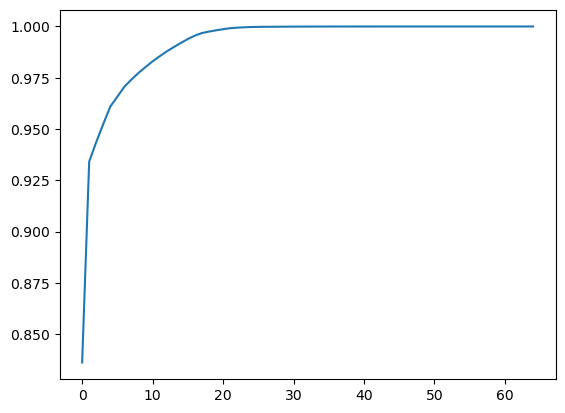

In [154]:
import numpy as np
pca = PCA(n_components=df.shape[1])
X_pca = pca.fit_transform(df)

# Wykres wyjaśnionej wariancji
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [179]:
import seaborn as sns
n_components = 2
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = [f'pca{i+1}' for i in range(n_components)]
df_pca["Bankruptcy"] = df['Bankruptcy']
df_pca

,pca1,pca2,Bankruptcy
0,-0.073116,0.197407,0.0
1,-0.062099,-0.020691,0.0
2,-0.066109,0.057655,0.0
3,-0.062198,-0.019289,0.0
4,-0.071853,0.171765,0.0
...,...,...,...
5782,0.931616,0.128001,1.0
5783,0.936425,0.035299,1.0
5784,0.929783,0.165004,1.0
5785,0.932168,0.117735,1.0


In [180]:
n_components = 2
pca = PCA(n_components=n_components)
df2_pca = pca.fit_transform(df2)
df2_pca = pd.DataFrame(df2_pca)
df2_pca.columns = [f'pca{i+1}' for i in range(n_components)]
df2_pca["Bankruptcy"] = df2['Bankruptcy']
df2_pca

,pca1,pca2,Bankruptcy
0,-0.077703,0.196696,0.0
1,-0.065521,-0.020922,0.0
2,-0.069934,0.057333,0.0
3,-0.065618,-0.019529,0.0
4,-0.076297,0.171069,0.0
...,...,...,...
5716,0.927390,0.132824,1.0
5717,0.932669,0.039784,1.0
5718,0.925342,0.170266,1.0
5719,0.927972,0.122807,1.0


In [181]:
n_components = 2
pca = PCA(n_components=n_components)
df3_pca = pca.fit_transform(df3)
df3_pca = pd.DataFrame(df3_pca)
df3_pca.columns = [f'pca{i+1}' for i in range(n_components)]
df3_pca["Bankruptcy"] = df3['Bankruptcy']
df3_pca

,pca1,pca2,Bankruptcy
0,-0.045792,0.187578,0.0
1,-0.036187,0.047976,0.0
2,-0.044048,0.161954,0.0
3,-0.032270,-0.008442,0.0
4,-0.038515,0.081639,0.0
...,...,...,...
4880,0.969206,0.003059,1.0
4881,0.971804,-0.032556,1.0
4882,0.968042,0.021184,1.0
4883,0.968690,0.010853,1.0


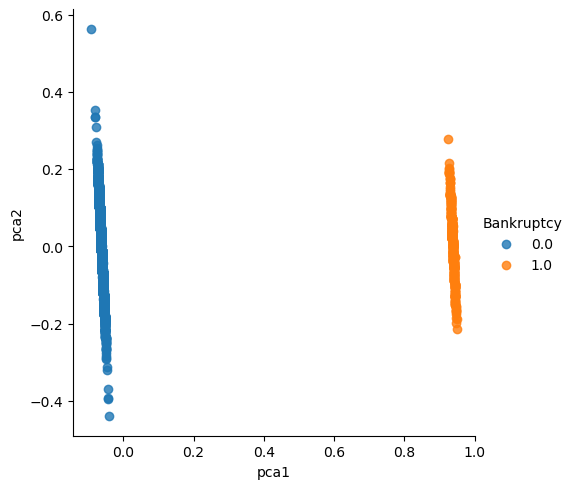

In [182]:
sns.lmplot(data=df_pca,x='pca1',y='pca2', hue = 'Bankruptcy', fit_reg=False)

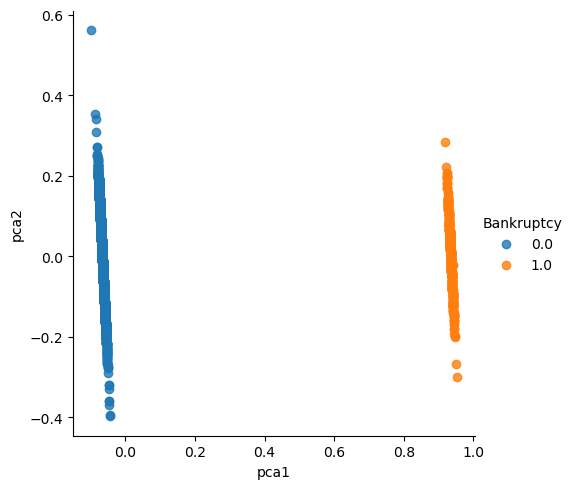

In [183]:
sns.lmplot(data=df2_pca,x='pca1',y='pca2', hue = 'Bankruptcy', fit_reg=False)

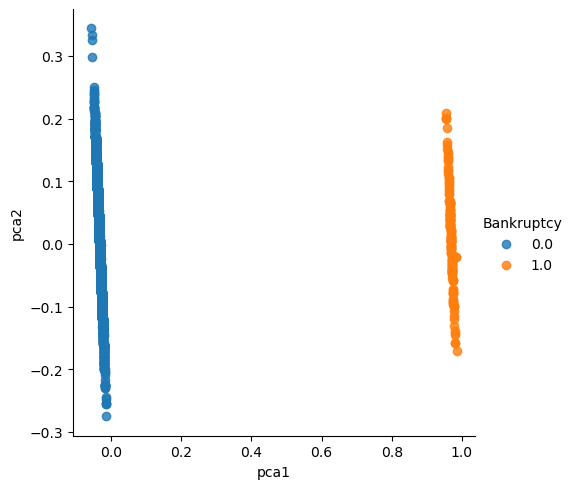

In [184]:
sns.lmplot(data=df3_pca,x='pca1',y='pca2', hue = 'Bankruptcy', fit_reg=False)

In [214]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df)

In [217]:
df2_tsne = tsne.fit_transform(df2)

In [218]:
df3_tsne = tsne.fit_transform(df3)

In [215]:
df_tsne = pd.DataFrame(df_tsne)
df_tsne.columns=[f'tsne{i+1}' for i in range(2)]
df_tsne['Bankruptcy'] = df['Bankruptcy']

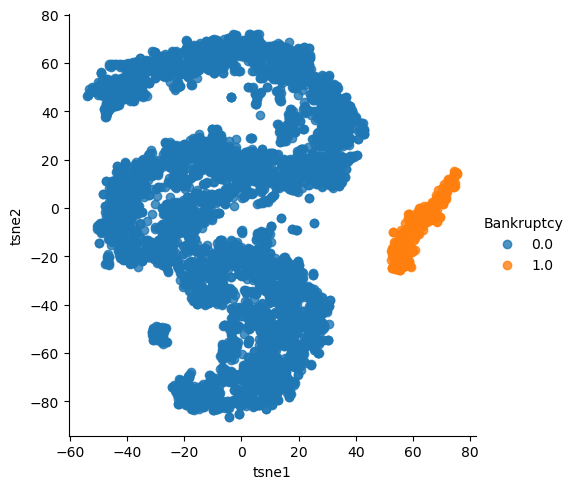

In [216]:
sns.lmplot(data=df_tsne,x='tsne1',y='tsne2', hue='Bankruptcy', fit_reg=False)

In [219]:
df2_tsne = pd.DataFrame(df2_tsne)
df2_tsne.columns=[f'tsne{i+1}' for i in range(2)]
df2_tsne['Bankruptcy'] = df2['Bankruptcy']

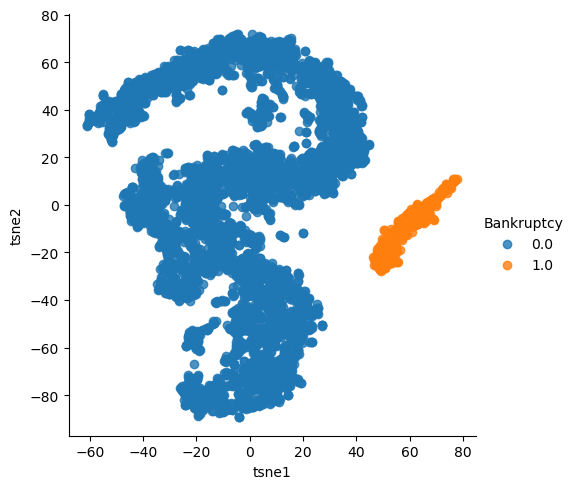

In [223]:
sns.lmplot(data=df2_tsne,x='tsne1',y='tsne2', hue='Bankruptcy', fit_reg=False)

In [221]:
df3_tsne = pd.DataFrame(df3_tsne)
df3_tsne.columns=[f'tsne{i+1}' for i in range(2)]
df3_tsne['Bankruptcy'] = df3['Bankruptcy']

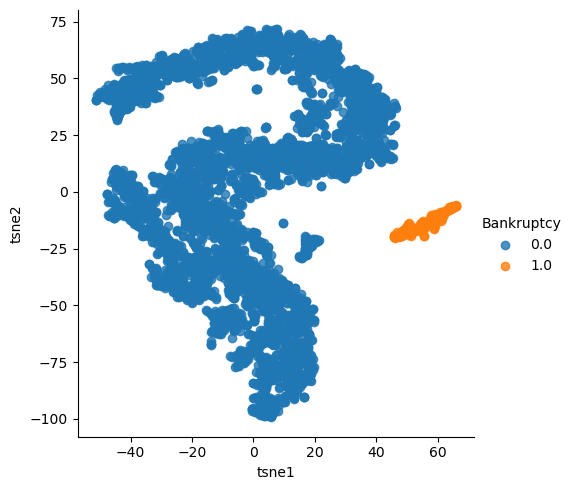

In [224]:
sns.lmplot(data=df3_tsne,x='tsne1',y='tsne2', hue='Bankruptcy', fit_reg=False)

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [168]:
X = df.drop("Bankruptcy", axis=1)  # Cechy
y = df["Bankruptcy"]  # Etykiety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inicjalizacja modelu
rf_model = RandomForestClassifier(n_estimators=100)

# Trenowanie modelu
rf_model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = rf_model.predict(X_test)

# Analiza wyników
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9499136442141624
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1079
         1.0       0.82      0.34      0.48        79

    accuracy                           0.95      1158
   macro avg       0.89      0.67      0.73      1158
weighted avg       0.94      0.95      0.94      1158



In [171]:
X2 = df2.drop("Bankruptcy", axis=1)  # Cechy
y2 = df2["Bankruptcy"]  # Etykiety

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

rf2_model = RandomForestClassifier(n_estimators=100)

# Trenowanie modelu
rf2_model.fit(X2_train, y2_train)

# Przewidywanie na zbiorze testowym
y2_pred = rf2_model.predict(X2_test)

# Analiza wyników
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.9502183406113537
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1069
         1.0       0.79      0.34      0.48        76

    accuracy                           0.95      1145
   macro avg       0.87      0.67      0.73      1145
weighted avg       0.94      0.95      0.94      1145



In [172]:
X3 = df3.drop("Bankruptcy", axis=1)  # Cechy
y3 = df3["Bankruptcy"]  # Etykiety

rf3_model = RandomForestClassifier(n_estimators=100)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

# Trenowanie modelu
rf3_model.fit(X3_train, y3_train)

# Przewidywanie na zbiorze testowym
y3_pred = rf3_model.predict(X3_test)

# Analiza wyników
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.9641760491299898
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       943
         1.0       0.33      0.03      0.05        34

    accuracy                           0.96       977
   macro avg       0.65      0.51      0.52       977
weighted avg       0.94      0.96      0.95       977

